kaggle:https://www.kaggle.com/datasets/ismaelhc/spain-covid19-regionwise-data?select=spain_covid19_casesdeats_upto19july.csv

A este dataset le cambiaremos el nombre por covidespania.csv



In [1]:
import pandas as pd
import numpy as np
import datetime as data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid= pd.read_csv('covidespania.csv', sep=";")
covid

,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths
0,A,Male,0-9,01/01/2020,0.0,0.0,0.0,0.0
1,A,Male,10-19,01/01/2020,0.0,0.0,0.0,0.0
2,A,Male,20-29,01/01/2020,0.0,0.0,0.0,0.0
3,A,Male,30-39,01/01/2020,0.0,0.0,0.0,0.0
4,A,Male,40-49,01/01/2020,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
882361,VI,Male,10-19,08/07/2021,18.0,0.0,0.0,0.0
882362,VI,Male,20-29,08/07/2021,16.0,0.0,0.0,0.0
882363,VI,Male,30-39,08/07/2021,8.0,0.0,0.0,0.0
882364,VI,Male,40-49,08/07/2021,6.0,0.0,0.0,0.0


In [3]:
covid.isnull().sum()

region_iso_code     33300
sex                294120
age_group           88236
date                    0
num_cases               1
num_hosp                1
num_icu                 1
num_deaths              1
dtype: int64

In [4]:
covid.notnull().sum()

region_iso_code    849066
sex                588246
age_group          794130
date               882366
num_cases          882365
num_hosp           882365
num_icu            882365
num_deaths         882365
dtype: int64

A partir de ahora usaremos los datos no nulos aunque los datos nulos sean significativos


In [5]:
covid=covid.dropna()
covid

,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths
0,A,Male,0-9,01/01/2020,0.0,0.0,0.0,0.0
1,A,Male,10-19,01/01/2020,0.0,0.0,0.0,0.0
2,A,Male,20-29,01/01/2020,0.0,0.0,0.0,0.0
3,A,Male,30-39,01/01/2020,0.0,0.0,0.0,0.0
4,A,Male,40-49,01/01/2020,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,08/07/2021,1.0,0.0,0.0,0.0
882361,VI,Male,10-19,08/07/2021,18.0,0.0,0.0,0.0
882362,VI,Male,20-29,08/07/2021,16.0,0.0,0.0,0.0
882363,VI,Male,30-39,08/07/2021,8.0,0.0,0.0,0.0


Creamos la columna "% de gravedad" para ver el % de ingresados en Uci con respecto a los hospitalizados

In [6]:
covid['% de gravedad']= (covid['num_icu']*100)/covid["num_hosp"]
covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths,% de gravedad
0,A,Male,0-9,01/01/2020,0.0,0.0,0.0,0.0,NaN
1,A,Male,10-19,01/01/2020,0.0,0.0,0.0,0.0,NaN
2,A,Male,20-29,01/01/2020,0.0,0.0,0.0,0.0,NaN
3,A,Male,30-39,01/01/2020,0.0,0.0,0.0,0.0,NaN
4,A,Male,40-49,01/01/2020,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,08/07/2021,1.0,0.0,0.0,0.0,NaN
882361,VI,Male,10-19,08/07/2021,18.0,0.0,0.0,0.0,NaN
882362,VI,Male,20-29,08/07/2021,16.0,0.0,0.0,0.0,NaN
882363,VI,Male,30-39,08/07/2021,8.0,0.0,0.0,0.0,NaN


Vemos el tipo de datos y vemos que la fecha no es tipo date así que la transformamos


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509441 entries, 0 to 882364
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   region_iso_code  509441 non-null  object 
 1   sex              509441 non-null  object 
 2   age_group        509441 non-null  object 
 3   date             509441 non-null  object 
 4   num_cases        509441 non-null  float64
 5   num_hosp         509441 non-null  float64
 6   num_icu          509441 non-null  float64
 7   num_deaths       509441 non-null  float64
 8   % de gravedad    114645 non-null  float64
dtypes: float64(5), object(4)
memory usage: 38.9+ MB


In [8]:
covid['date']=pd.to_datetime(covid["date"])

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509441 entries, 0 to 882364
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   region_iso_code  509441 non-null  object        
 1   sex              509441 non-null  object        
 2   age_group        509441 non-null  object        
 3   date             509441 non-null  datetime64[ns]
 4   num_cases        509441 non-null  float64       
 5   num_hosp         509441 non-null  float64       
 6   num_icu          509441 non-null  float64       
 7   num_deaths       509441 non-null  float64       
 8   % de gravedad    114645 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 38.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


A partir de este momento cogeremos los datos desde **Marzo de 2020**  que fue cuando se instauró en **España** el *Estado de Alarma*



In [9]:
covid=covid[covid.date > '2020-02-28']
covid


,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths,% de gravedad
3180,A,Male,0-9,2020-03-01,0.0,0.0,0.0,0.0,NaN
3181,A,Male,10-19,2020-03-01,0.0,0.0,0.0,0.0,NaN
3182,A,Male,20-29,2020-03-01,0.0,0.0,0.0,0.0,NaN
3183,A,Male,30-39,2020-03-01,0.0,0.0,0.0,0.0,NaN
3184,A,Male,40-49,2020-03-01,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,2021-08-07,1.0,0.0,0.0,0.0,NaN
882361,VI,Male,10-19,2021-08-07,18.0,0.0,0.0,0.0,NaN
882362,VI,Male,20-29,2021-08-07,16.0,0.0,0.0,0.0,NaN
882363,VI,Male,30-39,2021-08-07,8.0,0.0,0.0,0.0,NaN


Los datos nulos en mortalidad vienen de dividir numero de casos(0) y numero de muertos(0), al ser indefinido  pasaremos esos datos a 0 para no falsear las estadísticas

In [10]:
covid['% de gravedad'] = covid['% de gravedad']. fillna(0)
covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths,% de gravedad
3180,A,Male,0-9,2020-03-01,0.0,0.0,0.0,0.0,0.0
3181,A,Male,10-19,2020-03-01,0.0,0.0,0.0,0.0,0.0
3182,A,Male,20-29,2020-03-01,0.0,0.0,0.0,0.0,0.0
3183,A,Male,30-39,2020-03-01,0.0,0.0,0.0,0.0,0.0
3184,A,Male,40-49,2020-03-01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,2021-08-07,1.0,0.0,0.0,0.0,0.0
882361,VI,Male,10-19,2021-08-07,18.0,0.0,0.0,0.0,0.0
882362,VI,Male,20-29,2021-08-07,16.0,0.0,0.0,0.0,0.0
882363,VI,Male,30-39,2021-08-07,8.0,0.0,0.0,0.0,0.0


In [11]:
covid.tail(3000)

,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths,% de gravedad
877182,PM,Female,20-29,2021-05-07,47.0,0.0,1.0,0.0,inf
877183,PM,Female,30-39,2021-05-07,33.0,0.0,0.0,0.0,0.0
877184,PM,Female,40-49,2021-05-07,17.0,0.0,0.0,0.0,0.0
877185,PM,Female,50-59,2021-05-07,11.0,0.0,0.0,0.0,0.0
877186,PM,Female,60-69,2021-05-07,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,2021-08-07,1.0,0.0,0.0,0.0,0.0
882361,VI,Male,10-19,2021-08-07,18.0,0.0,0.0,0.0,0.0
882362,VI,Male,20-29,2021-08-07,16.0,0.0,0.0,0.0,0.0
882363,VI,Male,30-39,2021-08-07,8.0,0.0,0.0,0.0,0.0


Mostramos segund región y edad los casos totales

In [13]:
muestra=covid.groupby(['region_iso_code','age_group']).sum()
muestra=muestra.iloc[:,:-1]
muestra


num_cases  num_hosp  num_icu  num_deaths
region_iso_code age_group                                          
A                10-19       17002.0      76.0      5.0         1.0
                0-9          11102.0      77.0      2.0         0.0
                20-29        19281.0     212.0      9.0         2.0
                30-39        20499.0     494.0     36.0         7.0
                40-49        25011.0    1146.0    126.0        45.0
...                              ...       ...      ...         ...
ZA              40-49         1903.0      99.0      4.0         4.0
                50-59         2150.0     221.0     23.0         8.0
                60-69         1520.0     311.0     59.0        42.0
                70-79         1078.0     344.0     42.0        87.0
                80+           1784.0     683.0      5.0       364.0

[459 rows x 4 columns]

Mostramos los rangos de edad segmentados por generos donde hubo más muertes


In [14]:
mortalidad=covid.groupby(['age_group',"sex"]).sum()["num_deaths"]
mortalidad.sort_values()

age_group  sex   
0-9        Female        3.0
 10-19     Male          8.0
0-9        Male         10.0
 10-19     Female       11.0
20-29      Female       39.0
           Male         52.0
30-39      Female       88.0
           Male        124.0
40-49      Female      278.0
           Male        506.0
50-59      Female      855.0
           Male       1948.0
60-69      Female     2091.0
           Male       5347.0
70-79      Female     5603.0
           Male      11095.0
80+        Male      22782.0
           Female    24754.0
Name: num_deaths, dtype: float64

Y ahora, según provincia, vemos el número total de muertos ordenados de menor a mayor

In [15]:
mortalidad=covid.groupby(['region_iso_code']).sum()["num_deaths"]
mortalidad.sort_values(ascending=False)

region_iso_code
M     14697.0
B     10758.0
V      3688.0
A      2723.0
BI     2435.0
Z      2418.0
TO     2119.0
SE     1925.0
O      1873.0
GR     1667.0
CR     1614.0
MA     1600.0
MU     1548.0
VA     1460.0
CA     1405.0
GI     1384.0
SS     1212.0
T      1114.0
C      1085.0
J       951.0
SA      925.0
CO      914.0
BA      884.0
LE      880.0
CC      813.0
AL      813.0
PM      804.0
BU      778.0
CS      774.0
AB      774.0
LO      743.0
VI      712.0
PO      632.0
GU      611.0
L       592.0
SG      585.0
S       547.0
P       534.0
CU      516.0
ZA      505.0
HU      437.0
AV      433.0
TF      432.0
SO      408.0
OR      400.0
TE      390.0
H       381.0
GC      322.0
LU      208.0
ML       91.0
CE       80.0
Name: num_deaths, dtype: float64

In [14]:
covid['+-uci'] = (covid["num_hosp"]- covid["num_icu"])
covid.tail(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_iso_code,sex,age_group,date,num_cases,num_hosp,num_icu,num_deaths,% de gravedad,+-uci
880634,TE,Female,40-49,2021-07-07,3.0,0.0,0.0,0.0,0.0,0.0
880635,TE,Female,50-59,2021-07-07,3.0,0.0,0.0,0.0,0.0,0.0
880636,TE,Female,60-69,2021-07-07,1.0,0.0,0.0,0.0,0.0,0.0
880637,TE,Female,70-79,2021-07-07,1.0,0.0,0.0,0.0,0.0,0.0
880638,TE,Female,80+,2021-07-07,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
882360,VI,Male,0-9,2021-08-07,1.0,0.0,0.0,0.0,0.0,0.0
882361,VI,Male,10-19,2021-08-07,18.0,0.0,0.0,0.0,0.0,0.0
882362,VI,Male,20-29,2021-08-07,16.0,0.0,0.0,0.0,0.0,0.0
882363,VI,Male,30-39,2021-08-07,8.0,0.0,0.0,0.0,0.0,0.0


Aquí vemos el suma de la diferencia entre ingresados en uci y hospitalizaciones normales

In [15]:
uci=covid.groupby(['region_iso_code']).sum()["+-uci"]

uci


region_iso_code
A     11344.0
AB     2741.0
AL     3116.0
AV     1419.0
B     31639.0
BA     3119.0
BI     9395.0
BU     3565.0
C      5292.0
CA     5029.0
CC     2256.0
CE      204.0
CO     3980.0
CR     5070.0
CS     3011.0
CU     1711.0
GC     1949.0
GI     1749.0
GR     6894.0
GU     1802.0
H      2191.0
HU     1406.0
J      4115.0
L       988.0
LE     4284.0
LO     3002.0
LU     1016.0
M     90528.0
MA     7383.0
ML      588.0
MU     7624.0
O      7221.0
OR     1822.0
P      1868.0
PM     3797.0
PO     3405.0
S      2859.0
SA     3391.0
SE     9551.0
SG     1555.0
SO     1080.0
SS     2501.0
T      1946.0
TE     1224.0
TF     2344.0
TO     5243.0
V     17073.0
VA     5633.0
VI     2333.0
Z      8246.0
ZA     1628.0
Name: +-uci, dtype: float64

El número de muertos segun genero

In [18]:
genero=covid.groupby(['sex']).sum()["num_deaths"]
genero

sex
Female    33722.0
Male      41872.0
Name: num_deaths, dtype: float64

Mostramos la gráfica de muertos por ciudad

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


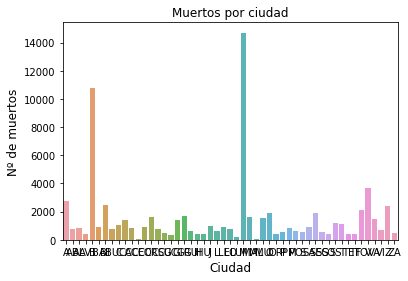

In [79]:

x=mortalidad.to_frame()
x.reset_index(inplace=True)
sns.barplot(x.region_iso_code, x.num_deaths, alpha=0.9)
plt.title('Muertos por ciudad')
plt.ylabel('Nº de muertos', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)
plt.show()


